In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers
import os
import cv2
import imghdr


In [ ]:
%cd drive/MyDrive/chest_xray

/content/drive/MyDrive/chest_xray


In [ ]:
#!unzip chest_xray.zip

In [ ]:
%cd chest_xray
data_dir='train'

/content/drive/MyDrive/chest_xray/chest_xray


In [ ]:
!pwd

/content/drive/MyDrive/chest_xray/chest_xray


In [ ]:
folders

['.DS_Store', 'NORMAL', 'PNEUMONIA']

In [ ]:
#creating a list of filepaths and labels so that we can easy map them togehter
filepaths=[]
labels=[]
folders=['NORMAL', 'PNEUMONIA']
for folder in folders:
   f_path = os.path.join(data_dir , folder)
   filelists = os.listdir(f_path)

   for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(folder)


In [ ]:
filepaths

['train/NORMAL/IM-0115-0001.jpeg',
 'train/NORMAL/IM-0117-0001.jpeg',
 'train/NORMAL/IM-0119-0001.jpeg',
 'train/NORMAL/IM-0122-0001.jpeg',
 'train/NORMAL/IM-0125-0001.jpeg',
 'train/NORMAL/IM-0127-0001.jpeg',
 'train/NORMAL/IM-0128-0001.jpeg',
 'train/NORMAL/IM-0129-0001.jpeg',
 'train/NORMAL/IM-0131-0001.jpeg',
 'train/NORMAL/IM-0135-0001.jpeg',
 'train/NORMAL/IM-0137-0001.jpeg',
 'train/NORMAL/IM-0140-0001.jpeg',
 'train/NORMAL/IM-0145-0001.jpeg',
 'train/NORMAL/IM-0147-0001.jpeg',
 'train/NORMAL/IM-0151-0001.jpeg',
 'train/NORMAL/IM-0152-0001.jpeg',
 'train/NORMAL/IM-0154-0001.jpeg',
 'train/NORMAL/IM-0156-0001.jpeg',
 'train/NORMAL/IM-0158-0001.jpeg',
 'train/NORMAL/IM-0162-0001.jpeg',
 'train/NORMAL/IM-0164-0001.jpeg',
 'train/NORMAL/IM-0166-0001.jpeg',
 'train/NORMAL/IM-0168-0001.jpeg',
 'train/NORMAL/IM-0170-0001.jpeg',
 'train/NORMAL/IM-0172-0001.jpeg',
 'train/NORMAL/IM-0176-0001.jpeg',
 'train/NORMAL/IM-0177-0001.jpeg',
 'train/NORMAL/IM-0178-0001.jpeg',
 'train/NORMAL/IM-01

In [ ]:
import pandas as pd
#making test_df where a img name next to its detection
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
data = pd.concat([Fseries , Lseries] , axis = 1)

In [ ]:
data.head()

,filepaths,label
0,train/NORMAL/IM-0115-0001.jpeg,NORMAL
1,train/NORMAL/IM-0117-0001.jpeg,NORMAL
2,train/NORMAL/IM-0119-0001.jpeg,NORMAL
3,train/NORMAL/IM-0122-0001.jpeg,NORMAL
4,train/NORMAL/IM-0125-0001.jpeg,NORMAL


In [ ]:
test_dir='test'
vaild_dir='val'

In [ ]:
#test
filepaths=[]
labels=[]
folders=['NORMAL', 'PNEUMONIA']
for folder in folders:
   f_path = os.path.join(data_dir , folder)
   filelists = os.listdir(f_path)

   for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(folder)
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
test = pd.concat([Fseries , Lseries] , axis = 1)

In [ ]:
#vaid
filepaths=[]
labels=[]
folders=['NORMAL', 'PNEUMONIA']
for folder in folders:
   f_path = os.path.join(data_dir , folder)
   filelists = os.listdir(f_path)

   for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(folder)
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
valid = pd.concat([Fseries , Lseries] , axis = 1)

In [ ]:
valid.head()

,filepaths,label
0,train/NORMAL/IM-0115-0001.jpeg,NORMAL
1,train/NORMAL/IM-0117-0001.jpeg,NORMAL
2,train/NORMAL/IM-0119-0001.jpeg,NORMAL
3,train/NORMAL/IM-0122-0001.jpeg,NORMAL
4,train/NORMAL/IM-0125-0001.jpeg,NORMAL


In [ ]:
img_size = (224 ,244)
batch_size = 45
tr_gen = ImageDataGenerator()
ts_gen= ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(data , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size =batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                       class_mode = 'categorical',color_mode = 'rgb' , shuffle= True, batch_size = batch_size)

test_gen = ts_gen.flow_from_dataframe(test , x_col= 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode= 'rgb' , shuffle = False , batch_size = batch_size)

Found 5216 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 2 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


Found 5216 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 2 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


Found 5216 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 2 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
#class_indices provide prediction label
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())

In [ ]:
gen_dict


{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
#define image shape
img_shape = (img_size[0] , img_size[1] , 3)
#number of classess
num_class = len(classes)

base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top = False , weights = 'imagenet' ,
                                                               input_shape = img_shape, pooling= 'max')
model = Sequential([
    base_model,
    BatchNormalization(axis= -1 , momentum= 0.99 , epsilon= 0.001),
    # Example of stronger regularization
    Dense(10, kernel_regularizer=regularizers.l2(l=0.05), activity_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01), activation='relu'),
    Dropout(rate= 0.7 , seed = 75),
    Dense(num_class , activation = 'softmax')
])

model.compile(Adamax(learning_rate = 0.001) , loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization_5 (Bat  (None, 1536)              6144      
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 10)                15370     
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                                 
 dense_11 (Dense)            (None, 2)                 22        
                                                                 
Total params: 10805071 (41.22 MB)
Trainable params: 10

In [ ]:
history=model.fit(train_gen,epochs=4,verbose = 1 , validation_data = valid_gen ,
                   validation_steps = None , shuffle = False)

Epoch 1/4
116/116 [==============================] - 236s 1s/step - loss: 1.1807 - accuracy: 0.8577 - val_loss: 0.7906 - val_accuracy: 0.9433
Epoch 2/4
116/116 [==============================] - 162s 1s/step - loss: 0.7638 - accuracy: 0.9024 - val_loss: 0.6356 - val_accuracy: 0.9103
Epoch 3/4
116/116 [==============================] - 164s 1s/step - loss: 0.6026 - accuracy: 0.9145 - val_loss: 0.5970 - val_accuracy: 0.8737
Epoch 4/4
116/116 [==============================] - 162s 1s/step - loss: 0.4996 - accuracy: 0.9216 - val_loss: 0.4025 - val_accuracy: 0.9505


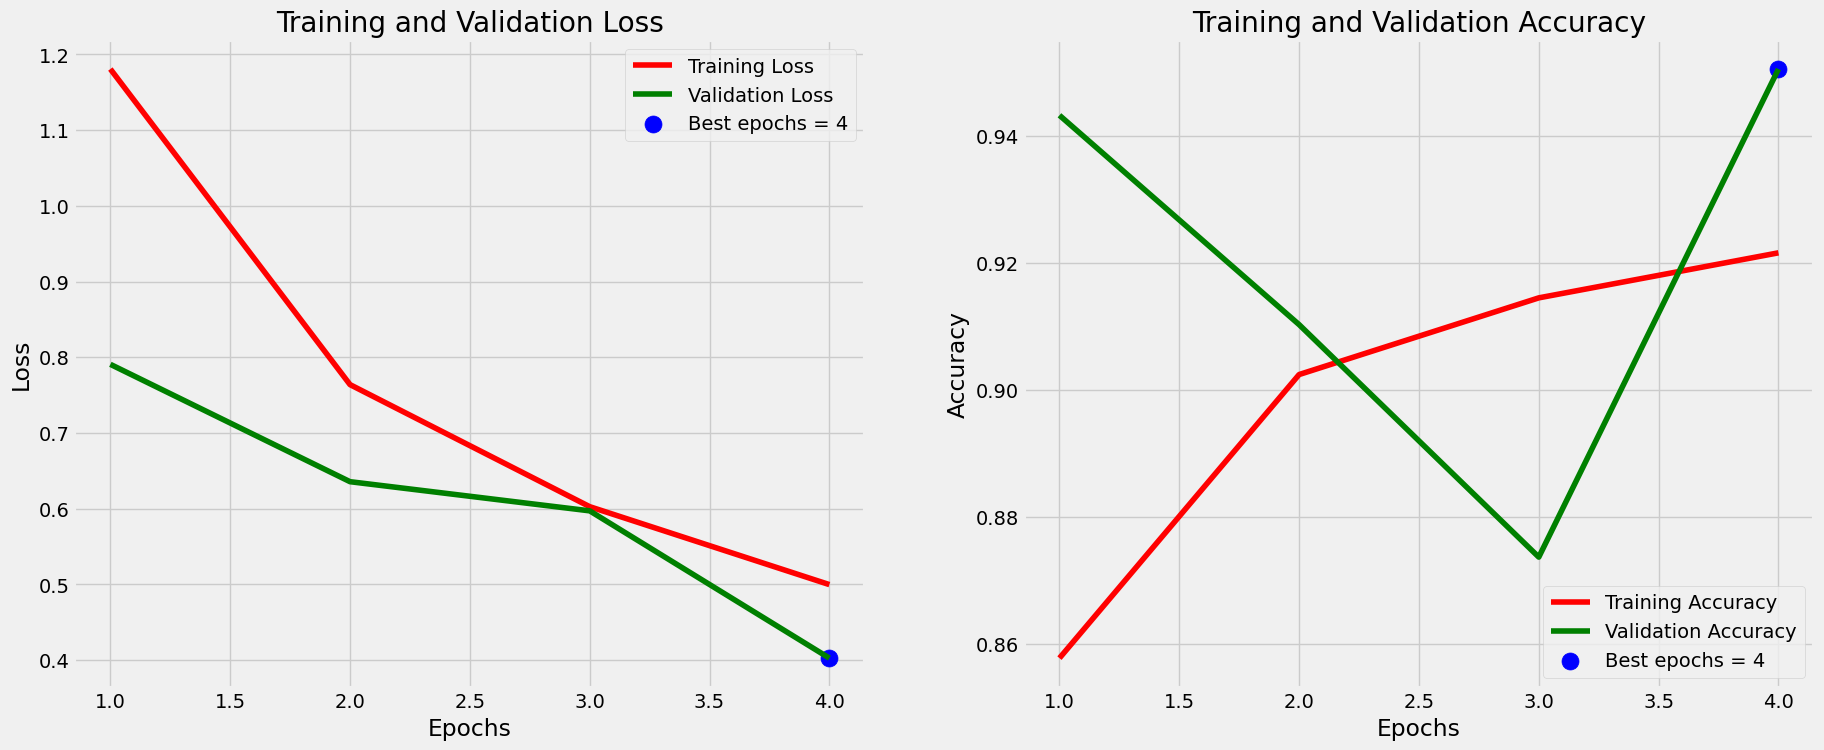

In [ ]:
import numpy as np
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

#Training history

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show();

In [ ]:
import numpy as np
preds = model.predict_generator(test_gen)

y_pred = np.argmax(preds , axis = 1)

<ipython-input-70-645f013499cd>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_gen)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_gen.classes, y_pred , target_names= classes ))

              precision    recall  f1-score   support

      NORMAL       1.00      0.81      0.89      1341
   PNEUMONIA       0.94      1.00      0.97      3875

    accuracy                           0.95      5216
   macro avg       0.97      0.90      0.93      5216
weighted avg       0.95      0.95      0.95      5216



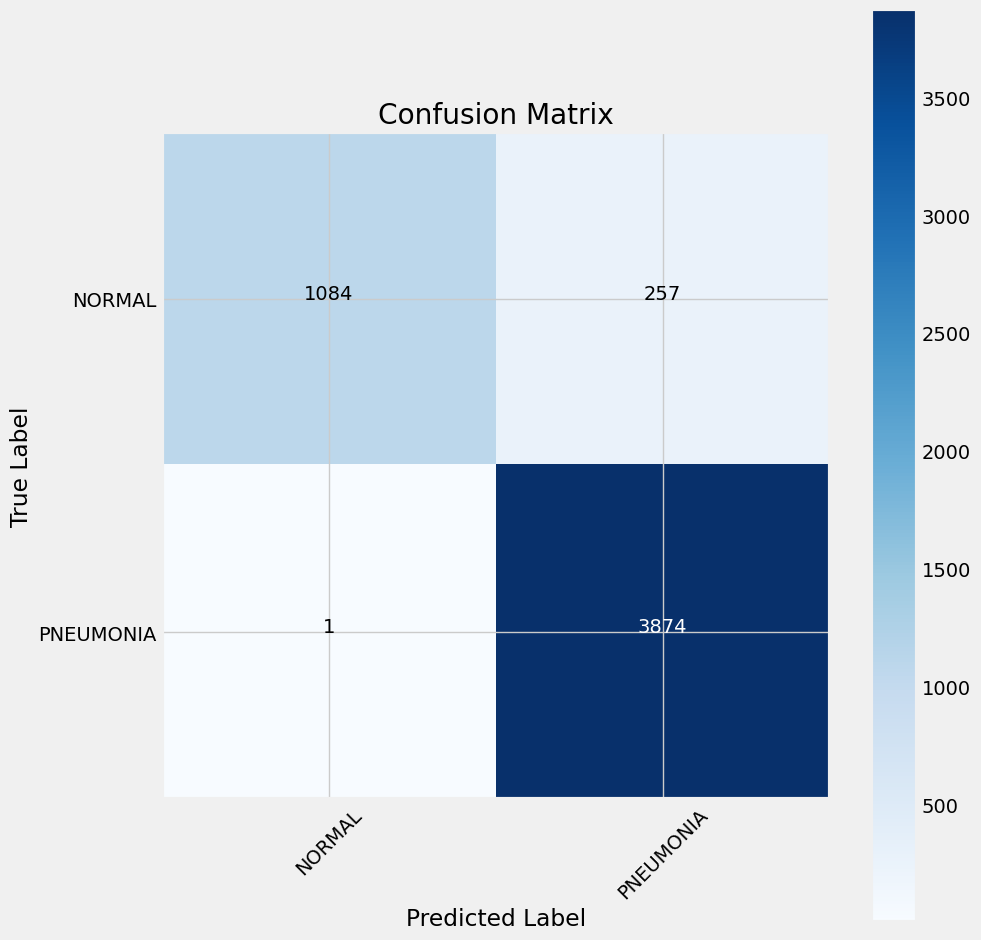

In [ ]:
# Confusion matix
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
save_dir = 'Save_Model'

# Save the model in different formats
tf.saved_model.save(model, save_dir)

In [ ]:
Tf_lite_model_name='tf_lite_model_Lung.tf.lite'
tf_lite_converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=tf_lite_converter.convert()

In [ ]:
open(Tf_lite_model_name, 'wb').write(tflite_model)

42824088